In [95]:
#Набор данных: список пассажиров Титаника
#Источник: https://www.kaggle.com/datasets/brendan45774/test-file
#Характер данных: реальные

"""
Список атрибутов:
PassengerId - Id пассажира (тип Int)
Survived - 1=выжил 0=мертв (тип Int)
Pclass - Номер класса пассажира (тип Int)
Name - Имя пассажира (тип String)
Sex - Пол пассажира (тип String)
Age - Возраст пассажира (тип Float)
SibSp - Количество братьев/сестер/cупруга на борту Титаника (тип Int)
Parch - Количество родителей/детей на борту Титаника (тип Int)
Ticket - Номер билета (тип String)
Fare - Цена билета (тип Float)
Cabin - номер кабины (тип Float)
Embarked - Порт, в котором произошла посадка на борт Титаника (тип String)
"""



import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

def create_plot(data, columns):
    n_bins = 20
    fig, axs = plt.subplots(2, 3)
    for index, col in enumerate(columns):
        axs[index // 3, index % 3].hist(data[:, index], bins=n_bins)
        axs[index // 3, index % 3].set_title(col)
    plt.show()

In [52]:
print("Загрузка данных...\n")
df = pd.read_csv('tested.csv')
df = df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket','Embarked','Cabin'])
print(df)

Загрузка данных...

     Survived  Pclass   Age  SibSp  Parch      Fare
0           0       3  34.5      0      0    7.8292
1           1       3  47.0      1      0    7.0000
2           0       2  62.0      0      0    9.6875
3           0       3  27.0      0      0    8.6625
4           1       3  22.0      1      1   12.2875
..        ...     ...   ...    ...    ...       ...
413         0       3   NaN      0      0    8.0500
414         1       1  39.0      0      0  108.9000
415         0       3  38.5      0      0    7.2500
416         0       3   NaN      0      0    8.0500
417         0       3   NaN      1      1   22.3583

[418 rows x 6 columns]


In [57]:
print("Среднее значение:\n")
for index, col in enumerate(df.columns):
    mean = df[col].mean()
    print(col, "-", mean)

Среднее значение:

Survived - 0.36363636363636365
Pclass - 2.2655502392344498
Age - 30.272590361445783
SibSp - 0.4473684210526316
Parch - 0.3923444976076555
Fare - 35.627188489208635


In [63]:
print("СКО:\n")
for index, col in enumerate(df.columns):
    var = df[col].var()
    SKO = math.sqrt(var)
    print(col, "-", SKO)

СКО:

Survived - 0.48162214093223055
Pclass - 0.8418375519640519
Age - 14.18120923562442
SibSp - 0.8967595611217125
Parch - 0.9814288785371684
Fare - 55.90757617997383


Text(0.5, 1.0, 'Age distribution')

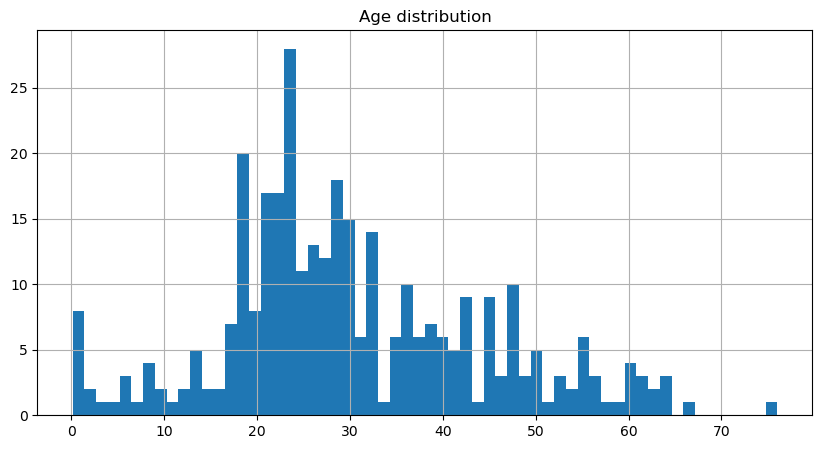

In [70]:
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=60)
plt.grid("True")
plt.title("Age distribution")
#Присутствует выброс, т.к. под конец большой разрыв в возрасте (приблизительно в 10 лет)

Text(0.5, 1.0, 'Survived distribution')

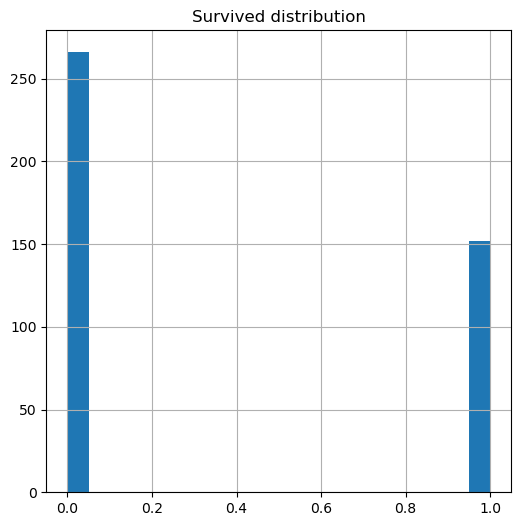

In [75]:
plt.figure(figsize=(6,6))
plt.hist(df['Survived'], bins=20)
plt.grid("True")
plt.title("Survived distribution")
#Выбросов нет

Text(0.5, 1.0, 'Pclass distribution')

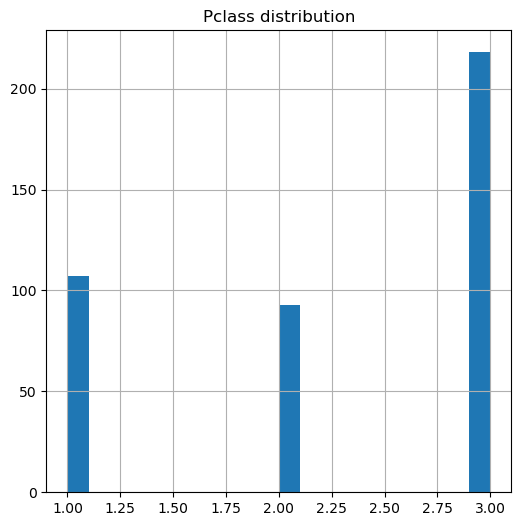

In [79]:
plt.figure(figsize=(6,6))
plt.hist(df['Pclass'], bins=20)
plt.grid("True")
plt.title("Pclass distribution")
#Выбросов нет

Text(0.5, 1.0, 'Fare distribution')

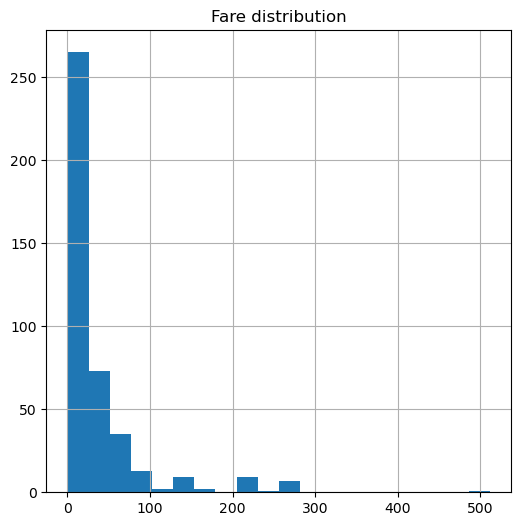

In [81]:
plt.figure(figsize=(6,6))
plt.hist(df['Fare'], bins=20)
plt.grid("True")
plt.title("Fare distribution")
#Есть выброс. Присутсвуют люди с билетом стоимостью в 500

Text(0.5, 1.0, 'SibSp distribution')

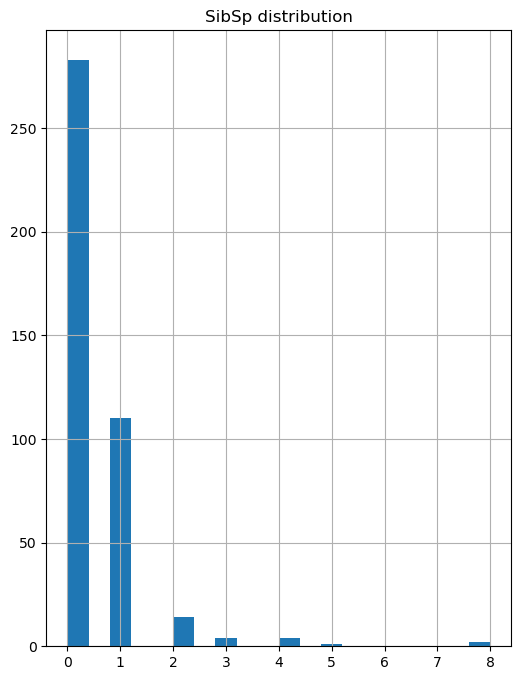

In [85]:
plt.figure(figsize=(6,8))
plt.hist(df['SibSp'], bins=20)
plt.grid("True")
plt.title("SibSp distribution")
#Есть выброс. Присутствуют люди с значением 8

Text(0.5, 1.0, 'Parch distribution')

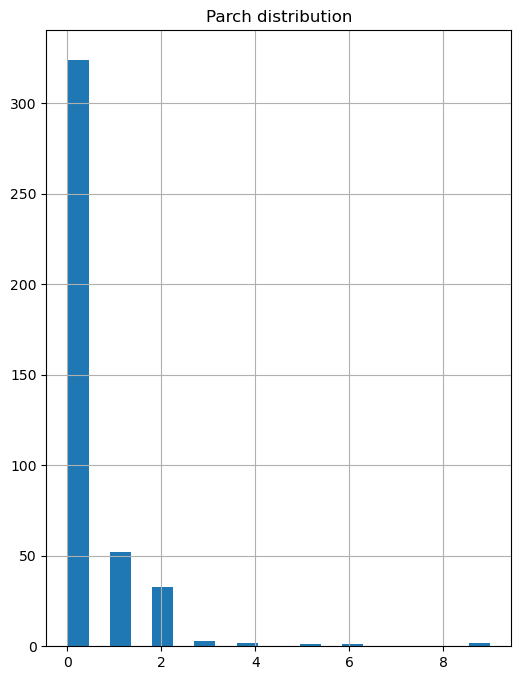

In [84]:
plt.figure(figsize=(6,8))
plt.hist(df['Parch'], bins=20)
plt.grid("True")
plt.title("Parch distribution")
#Есть выброс. Присутствуют люди с значением больше 8

In [89]:
print("Пропущенные значения:\n")
for index, col in enumerate(df.columns):
    missing_data = df[col].isnull().sum()
    print(col, "-", missing_data)
"""
Варианты обработки пропущенных значений:
1)Можно заполнить пропуски нулями.
2)Можно заменить пропущенные значения выборочным средним, медианой.
4)Можно воспользоваться методами интерполяции, чтобы на основе имеющихся данных заполнить пропущенные значения
""" 

Пропущенные значения:

Survived - 0
Pclass - 0
Age - 86
SibSp - 0
Parch - 0
Fare - 1


In [93]:
print("Корреляция:")
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
"""
Положительная корреляция - увеличение одной переменной влечет увеличение другой (корреляция стремится к 1)
Отрицательная корреляция - увеличение одной переменной влечет уменьшение другой (корреляция стремится к -1)
Корреляции нет - переменные независимы (корреляция равна 0)

Высокая корреляция:
1)У Pclass и Fare (-0.577147)
2)У Pclass и Age (-0.492143)
3)У Age и Fare (0.337932)
4)SibSp и Parch (0.306895)

Слабая корреляция:
1)У Survived и Age (-0.000013)
2)У Pclass и SibSp (0.001087)

Независимых нет
"""

Корреляция:


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


Матрица графиков рассеивания:


G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


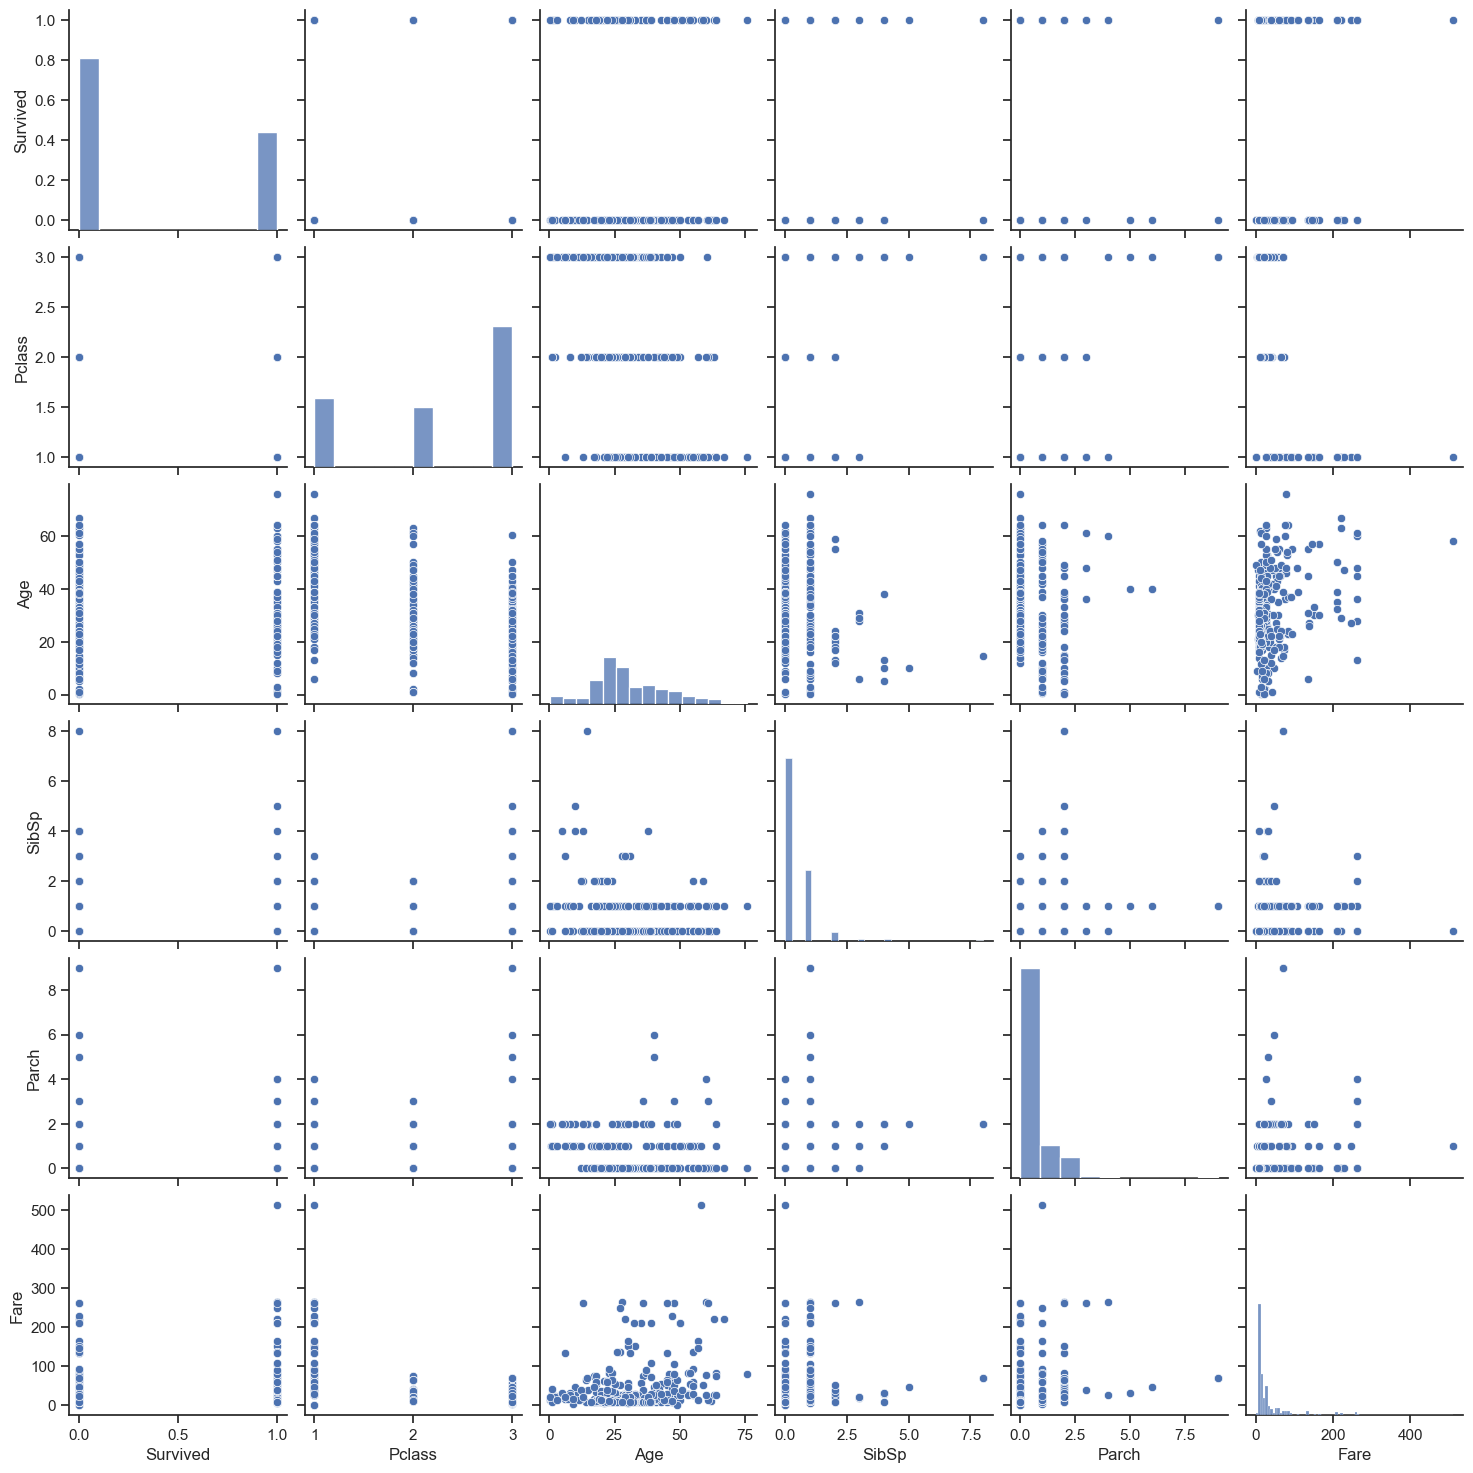

In [97]:
print("Матрица графиков рассеивания:")
sns.set(style="ticks")
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

In [ ]:
"""
Анализ полученных результатов:
Проведя анализ работы данных, мы выяснили, что наибольшее количество погибших людей были в возрасте от 20 до 30 лет.
Говоря о корреляции, сильной связи между атрибутами не наблюдается, но можно выделить что с ростом цены дилета пассажира уменьшалось 
количество его детей/родителей, которые были с ним на борту.
"""